In [7]:
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


Train Test Split

In [3]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

Trailing Rolling Mean

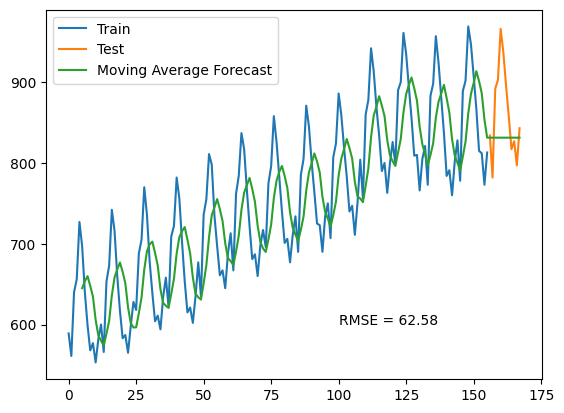

In [12]:
span = 6
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Moving Average Forecast')
rms = np.round( root_mean_squared_error(y_test, MA_series) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

### Simple Exponential Method

In [13]:
from statsmodels.tsa.api import SimpleExpSmoothing

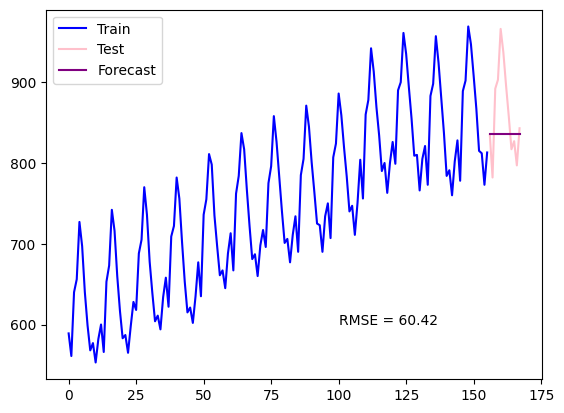

In [15]:
alpha = 0.2
ses_model = SimpleExpSmoothing(y_train).fit(smoothing_level=alpha,optimized=False)
fcast1 = ses_model.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

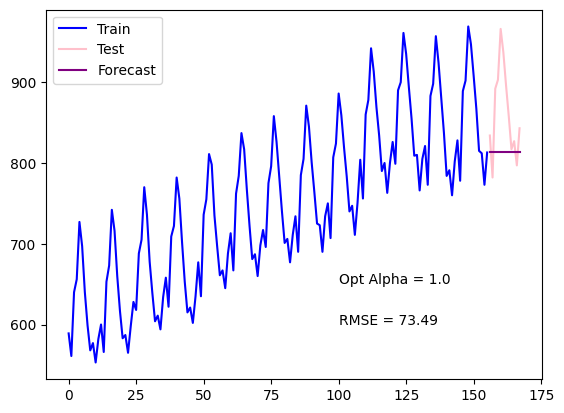

In [20]:
ses_model = SimpleExpSmoothing(y_train).fit(optimized=True)
fcast1 = ses_model.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
opt_alpha = np.round(ses_model.model.params['smoothing_level'],2)
plt.text(100, 650, f"Opt Alpha = {opt_alpha}")
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

### Holt' Linear Trend

In [21]:
from statsmodels.tsa.api import Holt

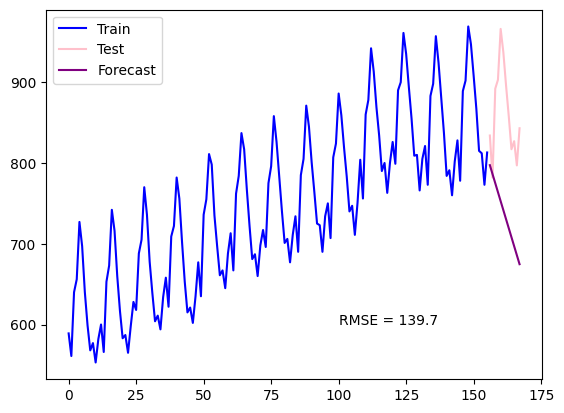

In [29]:
alpha, beta = 0.4, 0.2
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

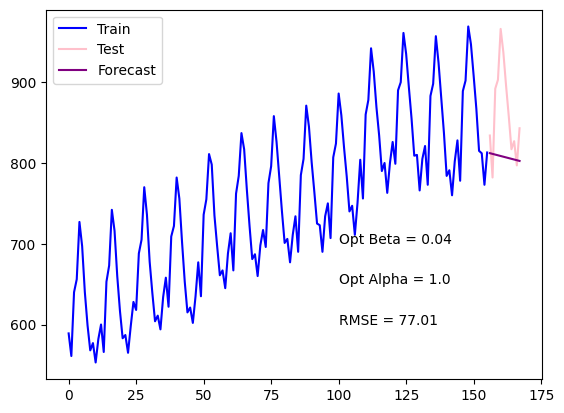

In [27]:
holt = Holt(y_train)
fit1 = holt.fit(optimized=True)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.text(100, 650, f"Opt Alpha = {np.round(fit1.params['smoothing_level'],2)}")
plt.text(100, 700, f"Opt Beta = {np.round(fit1.params['smoothing_trend'],2)}")
plt.legend(loc='best')
plt.show()

### Holt' Exponential Trend

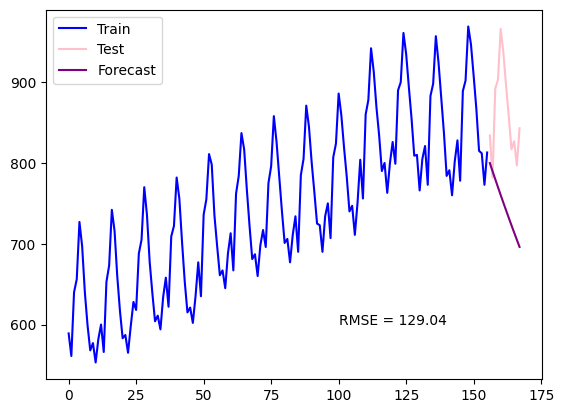

In [30]:
alpha, beta = 0.4, 0.2
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

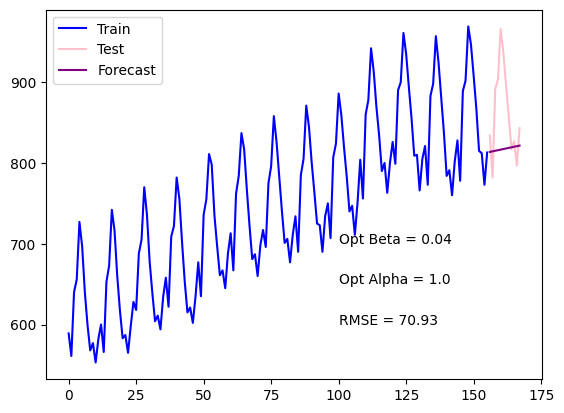

In [32]:
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(optimized=True)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.text(100, 650, f"Opt Alpha = {np.round(fit1.params['smoothing_level'],2)}")
plt.text(100, 700, f"Opt Beta = {np.round(fit1.params['smoothing_trend'],2)}")
plt.legend(loc='best')
plt.show()

### Additive Damped Trend

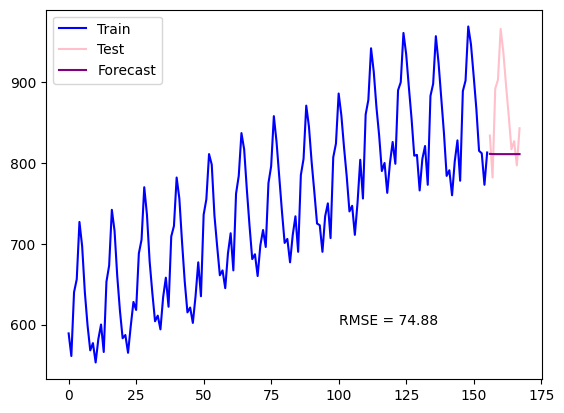

In [33]:
alpha, beta, phi = 0.4, 0.2, 0.3
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta,
                    damping_trend=phi ,optimized=False)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(100, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

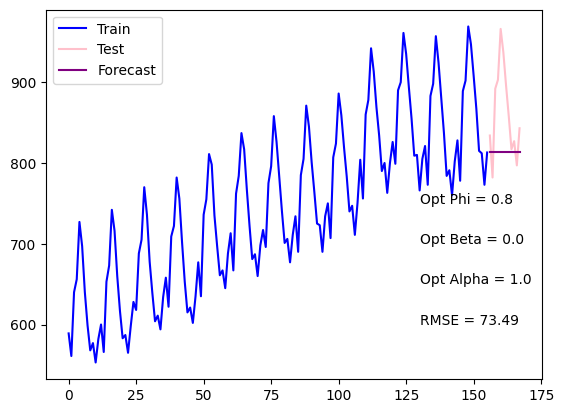

In [35]:
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit(optimized=True)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(130, 600, f"RMSE = {rms}")
plt.text(130, 650, f"Opt Alpha = {np.round(fit1.params['smoothing_level'],2)}")
plt.text(130, 700, f"Opt Beta = {np.round(fit1.params['smoothing_trend'],2)}")
plt.text(130, 750, f"Opt Phi = {np.round(fit1.params['damping_trend'],2)}")
plt.legend(loc='best')
plt.show()

### Holt-Winters Additive

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

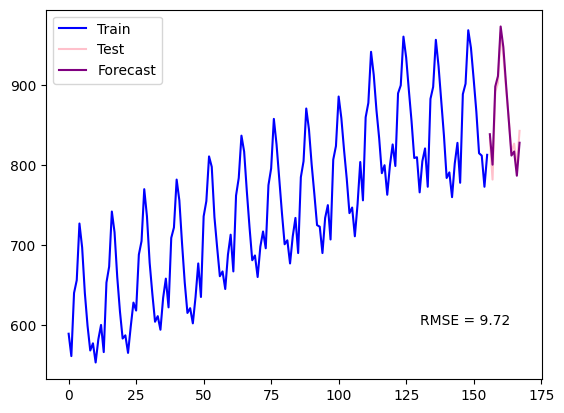

In [37]:
alpha, beta, gamma = 0.8, 0.02, 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(130, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

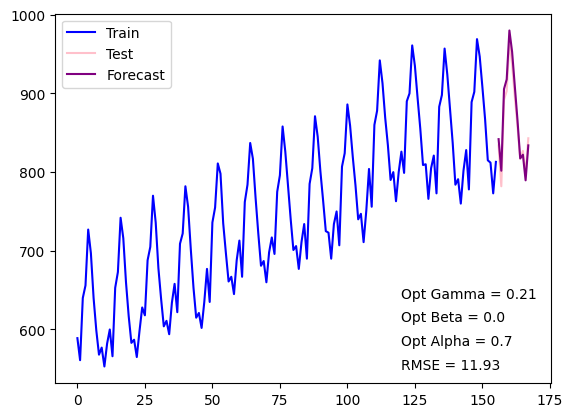

In [39]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit(optimized=True)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(120, 550, f"RMSE = {rms}")
plt.text(120, 580, f"Opt Alpha = {np.round(fit1.params['smoothing_level'],2)}")
plt.text(120, 610, f"Opt Beta = {np.round(fit1.params['smoothing_trend'],2)}")
plt.text(120, 640, f"Opt Gamma = {np.round(fit1.params['smoothing_seasonal'],2)}")
plt.legend(loc='best')
plt.show()

### Holt-Winters Multiplicative

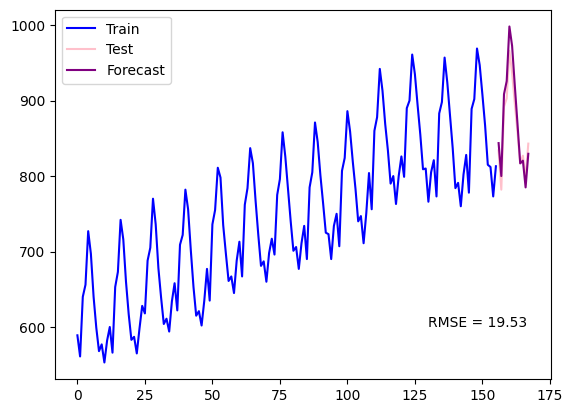

In [40]:
alpha, beta, gamma = 0.8, 0.02, 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(130, 600, f"RMSE = {rms}")
plt.legend(loc='best')
plt.show()

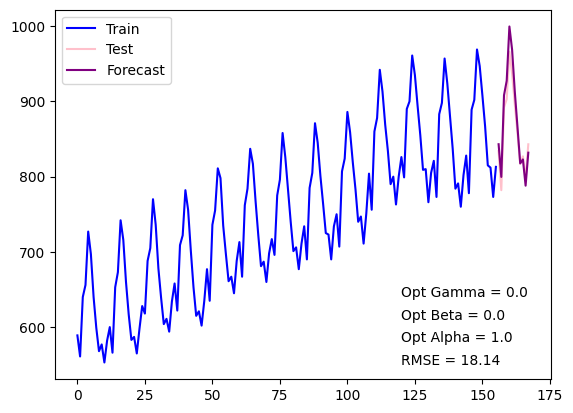

In [41]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_add.fit(optimized=True)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rms = np.round( root_mean_squared_error(y_test, fcast1) , 2 )
plt.text(120, 550, f"RMSE = {rms}")
plt.text(120, 580, f"Opt Alpha = {np.round(fit1.params['smoothing_level'],2)}")
plt.text(120, 610, f"Opt Beta = {np.round(fit1.params['smoothing_trend'],2)}")
plt.text(120, 640, f"Opt Gamma = {np.round(fit1.params['smoothing_seasonal'],2)}")
plt.legend(loc='best')